<a href="https://colab.research.google.com/github/AgunsBaba/Assignment/blob/master/Logistic_Random_Forest_or_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score

In [ ]:
#import data
df = pd.read_csv('/content/Wine_cultivars.csv')
df.head()

,Class label,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavonid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
#check null count and dtype for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavonid phenols           178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [ ]:
#check label distribution
print(df['Class label'].value_counts(normalize=True))

2    0.398876
1    0.331461
3    0.269663
Name: Class label, dtype: float64


In [ ]:
#split data in to features and labels
X = df.drop(columns='Class label')
y = df['Class label']

In [ ]:
#split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#scale and transform data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate models
logreg = LogisticRegression(random_state=42)
knn = KNeighborsClassifier()
rand = RandomForestClassifier(random_state=42)

In [ ]:
#fitting, scoring and tuning the hyperparameters for the logistic regression model
logreg.fit(X_train, y_train)
print(logreg.score(X_test, y_test))

0.9814814814814815


In [ ]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#add L2 penalty
logreg_l2 = LogisticRegression(penalty='l2', random_state=42)

#fit l2 penalty model and get score
logreg_l2.fit(X_train, y_train)
print(logreg_l2.score(X_test, y_test))

0.9814814814814815


The model accuracy is the same for both L1 and L2 penalty

In [ ]:
#try KNN model
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.9629629629629629


In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
#check how the model performs with a range of n_neighbors
nbors_score = []
nbors_list = list(range(2, 10))
for i in nbors_list:
  knn_test = KNeighborsClassifier(n_neighbors=i)
  knn_test.fit(X_train, y_train)
  score_knn = knn_test.score(X_test, y_test)
  nbors_score.append(score_knn)

Text(0, 0.5, 'Accuracy')

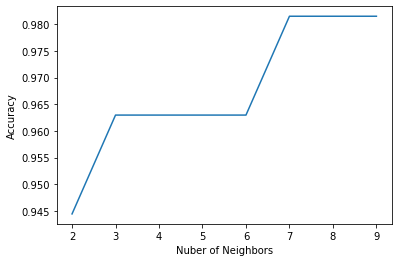

In [ ]:
#plot to visualize best accuracy vs number of neighbors
plt.plot(nbors_list, nbors_score)
plt.xlabel('Nuber of Neighbors')
plt.ylabel('Accuracy')

Maximum accuracy is obtained when nearest neighbor is 7 for KNN

In [ ]:
#try RandomForest
rand.fit(X_train, y_train)
print(rand.score(X_test, y_test))

1.0


Based on this result, it seems Random forest is overfitting. To confirm this, it's ok to check on the accuracy score for training set

In [ ]:
#check accuracy of RandomForest on training set
print(rand.score(X_train, y_train))

1.0


Accuracy score for training set is also 100%, so probably our model is not over-fitting but perfect?

In [ ]:
rand.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Checking of there's variability in accuracy based on tuning max_depth
rand_score = []
rand_list = list(range(2, 20))
for i in rand_list:
  rand_test = RandomForestClassifier(random_state=42)
  rand_test.fit(X_train, y_train)
  score_rand = rand_test.score(X_test, y_test)
  rand_score.append(score_rand)

Text(0, 0.5, 'Accuracy')

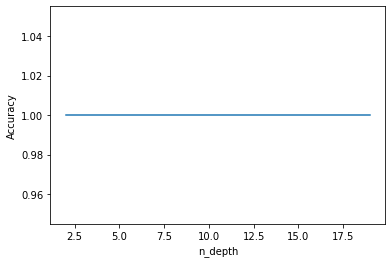

In [ ]:
#plot to visualize best accuracy vs n_depth
plt.plot(rand_list, rand_score)
plt.xlabel('n_depth')
plt.ylabel('Accuracy')

Plot shows there's no variability even after varying the n_depth hyperparameter. Maybe our model is perfect? 😊

In [ ]:
#fit models with the best hyperparameters
knn_best = KNeighborsClassifier(n_neighbors=7)
knn_best.fit(X_train, y_train)
knn_best.score(X_test, y_test)

0.9814814814814815

The Random Forest model performed best with an accuracy of 100%, while the performance of the Logistic Regression and KNN (after tuning) is the same at 98.15%. I'd recommend the Random Forest model given the accuracy score